In [3]:
import torch
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sin

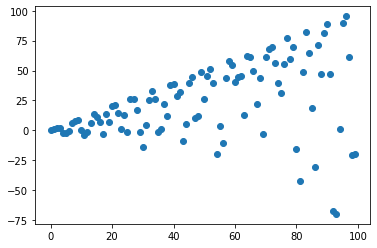

In [9]:
x1_points = []
x2_points = []
y_points = []

for i in range(100):
    x1_points.append(float(i))
    x2_points.append(sin(float(i)))
    y_points.append(rand.uniform(x1_points[-1], x2_points[-1]*x1_points[-1]))


plt.plot(x1_points, y_points, "o")
plt.show()

In [11]:
# Lets create a new joint x_points list

x_points = []

for i in range(len(x1_points)):
    x_points.append([x1_points[i], x2_points[i]])

In [12]:
# Split data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(x_points, y_points, test_size=0.3, random_state=42)


In [13]:
# Now that we've generated some points at random, its time to use torch 
# to execute linear regression

X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [15]:
# Solve for alpha and beta in Bivariate regression 

alpha_1 = 0
alpha_2 = 0

run_num_1 = 0
run_den_1 = 0
run_num_2 = 0
run_den_2 = 0

for i, x in enumerate(X_train):
    run_num_1 += (x[0] - torch.mean(X_train[0])) * (y_train[i] - torch.mean(y_train))
    run_den_1 += (x[0] - torch.mean(X_train[0]))**2

    run_num_2 += (x[1] - torch.mean(X_train[1])) * (y_train[i] - torch.mean(y_train))
    run_den_2 += (x[1] - torch.mean(X_train[1]))**2

alpha_1 = run_num_1/run_den_1
alpha_2 = run_num_2/run_den_2

beta = torch.mean(y_train) - alpha_1*torch.mean(X_train) - alpha_2*torch.mean(X_train)

alpha_1, alpha_2, beta

(tensor(0.0757), tensor(0.0183), tensor(18.8824))

In [16]:
# Define the regression function

def regression_line(alpha_1, alpha_2, beta, x_values):

    y_pred = []

    for x in x_values:

        # First Try
        y_pred.append(alpha_1*x[0] + alpha_2*x[1] + beta)
        

    return y_pred

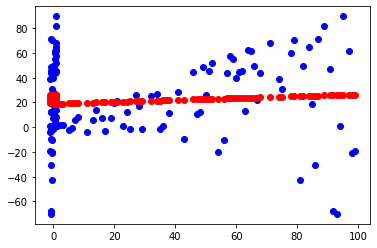

In [17]:
# Call the function and get y_pred

y_pred  = regression_line(alpha_1, alpha_2, beta, X_train)

plt.plot(X_train, y_train, "o", color="blue")
plt.plot(X_train, y_pred, "o", color="red")

plt.show()

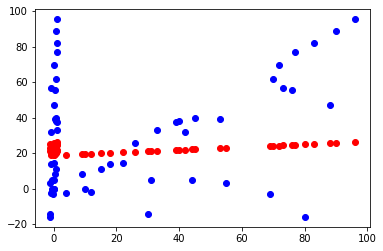

In [18]:
# Time to see ho well it abstracts to unseen data

y_pred  = regression_line(alpha_1, alpha_2, beta, X_test)

plt.plot(X_test, y_test, "o", color="blue")
plt.plot(X_test, y_pred, "o", color="red")

plt.show()

Looks like it did a fairly decent job of approximating this linearly generated set, which we expected. We can try experimenting how well it will work for other forms of data

In [19]:
# Lets calculate the mean squared error

def MSE(y_pred, y_true):

    residuals = 0

    for i in range(len(y_pred)):
        residuals += (y_pred[i] - y_true[i])**2

    return residuals/len(y_pred)

In [20]:
MSE(y_pred, y_test)

tensor(951.4411)